## Importing Liabraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [2]:
water_data=pd.read_csv("water_potability.csv")

## Data Preprocessing

In [3]:
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
water_data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [5]:
water_data.shape

(3276, 10)

In [6]:
water_data.columns


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
water_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
water_data['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

# Dealing with missing data

In [10]:
water_data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
ph_df = water_data["ph"]
Sulfate_df = water_data["Sulfate"]
Trihalomethanes_df = water_data["Trihalomethanes"]

ph_percentage_missing = round((ph_df.isnull().sum() / len(water_data)) * 100, 2)
Sulfate_percentage_missing = round((Sulfate_df.isnull().sum() / len(water_data)) * 100, 2)
Trihalomethanes_percentage_missing = round((Trihalomethanes_df.isnull().sum() / len(water_data)) * 100, 2)

print("PH Missing Data Percentage:", ph_percentage_missing,"%")
print("Sulfate Missing Data Percentage:", Sulfate_percentage_missing,"%")
print("Trihalomethanes Missing Data Percentage:", Trihalomethanes_percentage_missing,"%")


PH Missing Data Percentage: 14.99 %
Sulfate Missing Data Percentage: 23.84 %
Trihalomethanes Missing Data Percentage: 4.95 %


In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(water_data[['ph','Sulfate','Trihalomethanes']])
water_data[['ph','Sulfate','Trihalomethanes']] = imputer.transform(water_data[['ph','Sulfate','Trihalomethanes']])
water_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [13]:
water_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Dealing with outliers

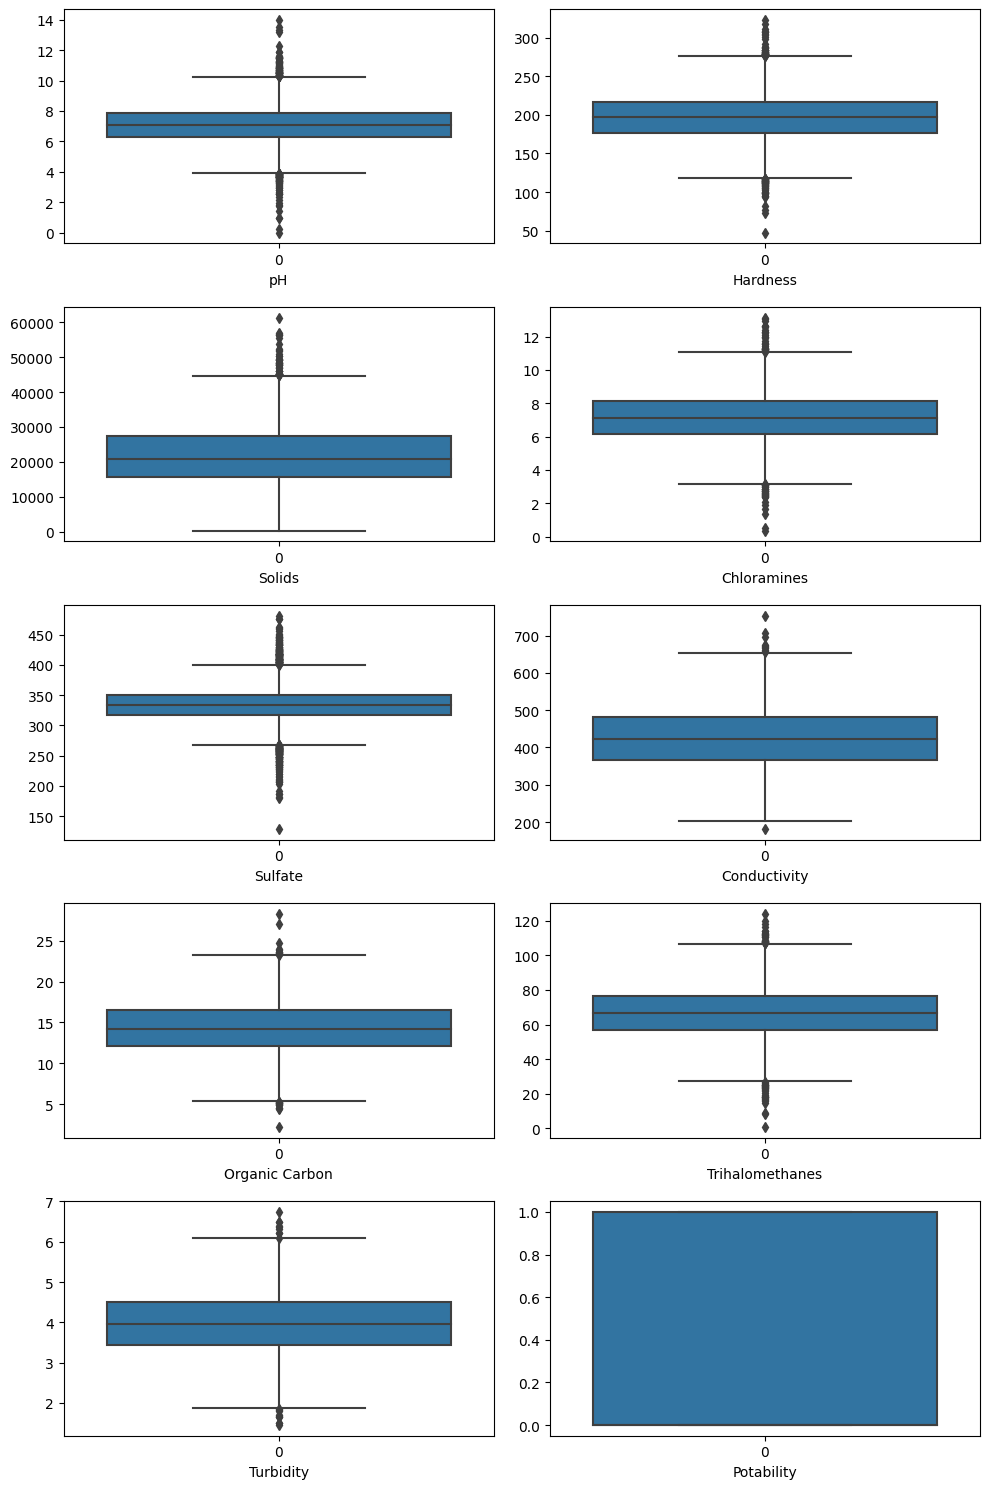

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,15))
plt.subplot(5, 2, 1)
sns.boxplot(water_data['ph'])
plt.xlabel('pH')
plt.subplot(5, 2, 2)
sns.boxplot(water_data['Hardness'])
plt.xlabel('Hardness')
plt.subplot(5, 2, 3)
sns.boxplot(water_data['Solids'])
plt.xlabel('Solids')
plt.subplot(5, 2, 4)
sns.boxplot(water_data['Chloramines'])
plt.xlabel('Chloramines')
plt.subplot(5, 2, 5)
sns.boxplot(water_data['Sulfate'])
plt.xlabel('Sulfate')
plt.subplot(5, 2, 6)
sns.boxplot(water_data['Conductivity'])
plt.xlabel('Conductivity')
plt.subplot(5, 2, 7)
sns.boxplot(water_data['Organic_carbon'])
plt.xlabel('Organic Carbon')
plt.subplot(5, 2, 8)
sns.boxplot(water_data['Trihalomethanes'])
plt.xlabel('Trihalomethanes')
plt.subplot(5, 2, 9)
sns.boxplot(water_data['Turbidity'])
plt.xlabel('Turbidity')
plt.subplot(5, 2, 10)
sns.boxplot(water_data['Potability'])
plt.xlabel('Potability')

plt.tight_layout()
plt.show()


#### Removing Outliers

In [15]:
import numpy as np
import pandas as pd

# Calculate the quartiles and IQR for each column
Q1 = water_data.quantile(0.25)
Q3 = water_data.quantile(0.75)
IQR = Q3 - Q1

# Select the non-outliers for each column
water_data_new = water_data[((water_data >= Q1 - 1.5*IQR) & (water_data <= Q3 + 1.5*IQR)).all(axis=1)]

# Print the non-outliers
water_data_new


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


### Data After removing outliers

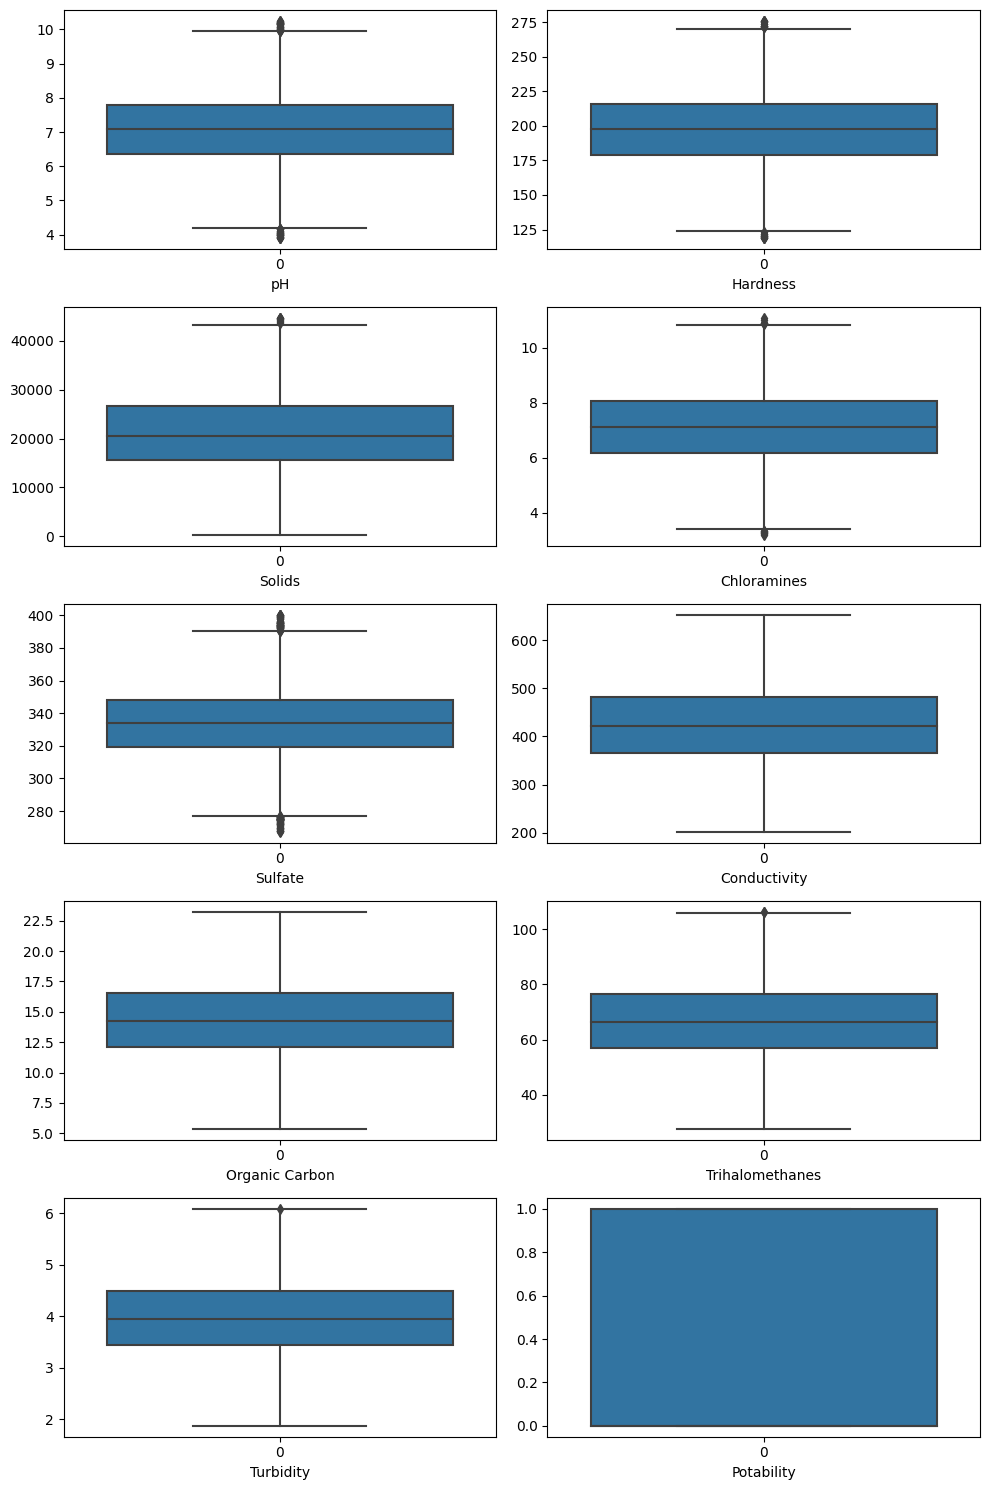

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,15))
plt.subplot(5, 2, 1)
sns.boxplot(water_data_new['ph'])
plt.xlabel('pH')
plt.subplot(5, 2, 2)
sns.boxplot(water_data_new['Hardness'])
plt.xlabel('Hardness')
plt.subplot(5, 2, 3)
sns.boxplot(water_data_new['Solids'])
plt.xlabel('Solids')
plt.subplot(5, 2, 4)
sns.boxplot(water_data_new['Chloramines'])
plt.xlabel('Chloramines')
plt.subplot(5, 2, 5)
sns.boxplot(water_data_new['Sulfate'])
plt.xlabel('Sulfate')
plt.subplot(5, 2, 6)
sns.boxplot(water_data_new['Conductivity'])
plt.xlabel('Conductivity')
plt.subplot(5, 2, 7)
sns.boxplot(water_data_new['Organic_carbon'])
plt.xlabel('Organic Carbon')
plt.subplot(5, 2, 8)
sns.boxplot(water_data_new['Trihalomethanes'])
plt.xlabel('Trihalomethanes')
plt.subplot(5, 2, 9)
sns.boxplot(water_data_new['Turbidity'])
plt.xlabel('Turbidity')
plt.subplot(5, 2, 10)
sns.boxplot(water_data_new['Potability'])
plt.xlabel('Potability')

plt.tight_layout()
plt.show()


# Data Visualization

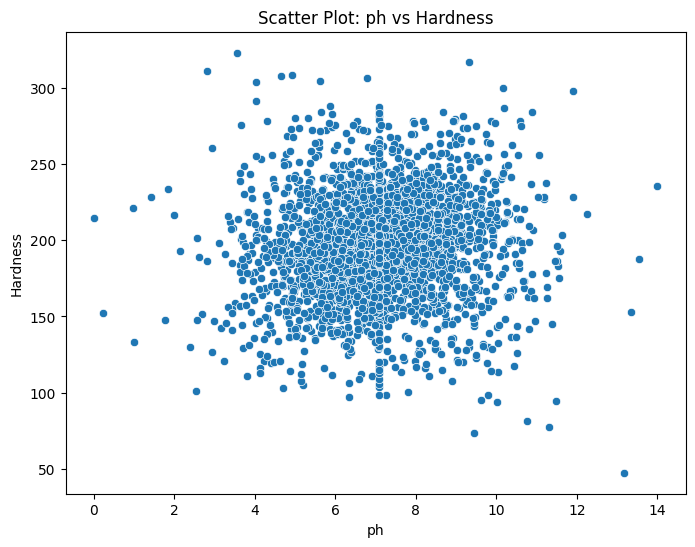

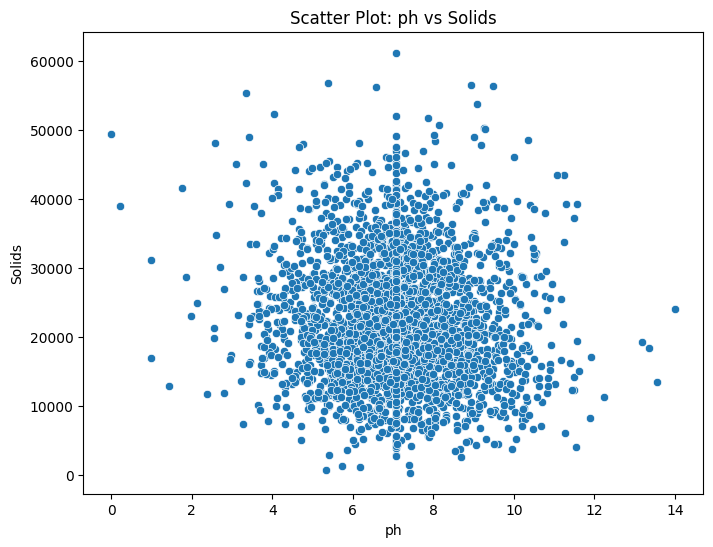

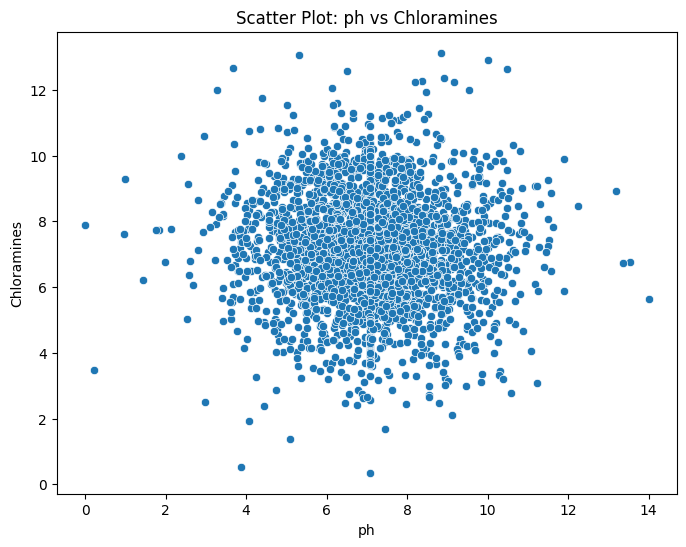

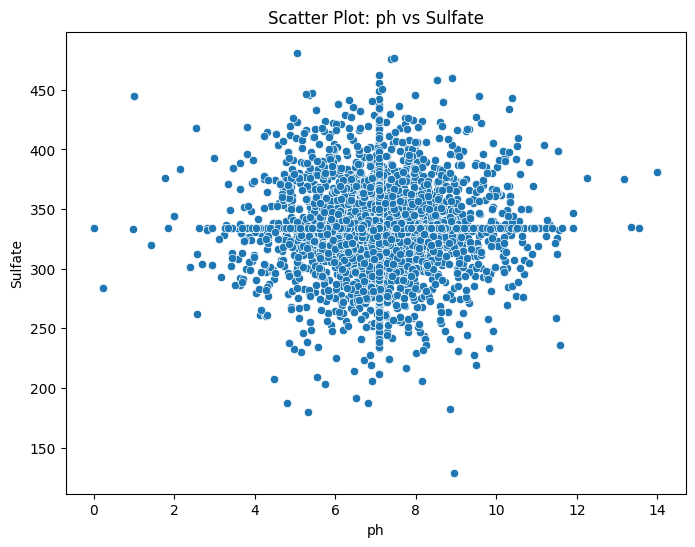

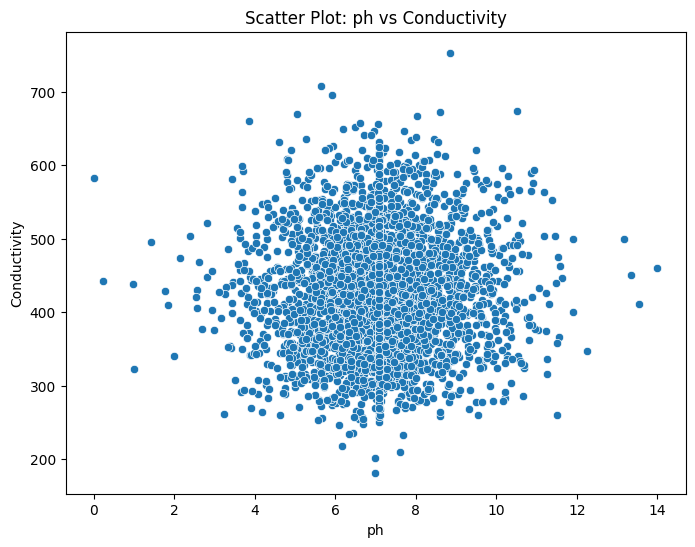

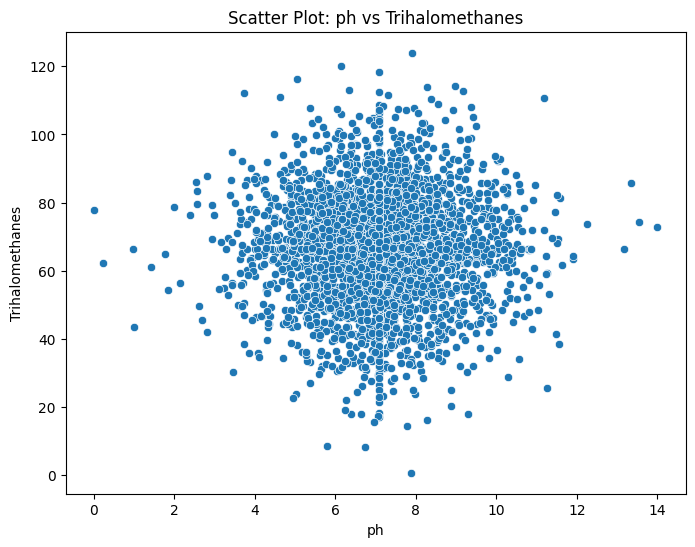

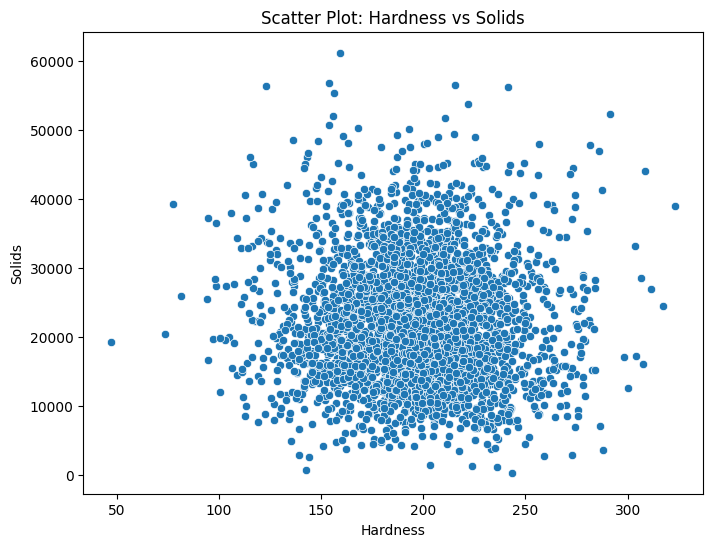

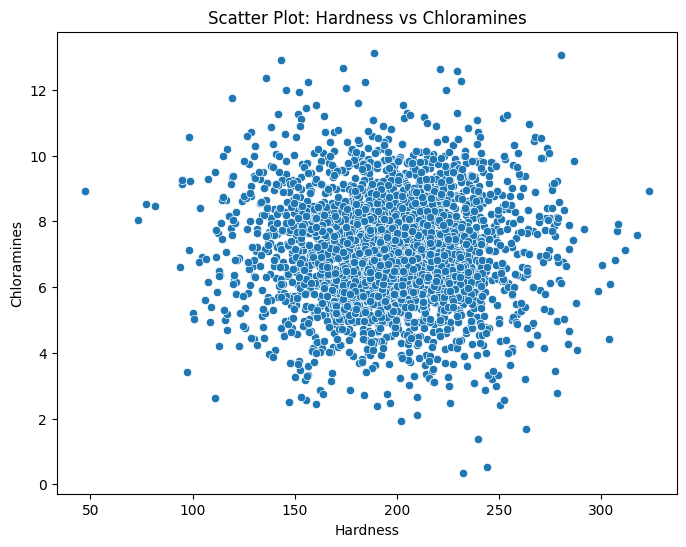

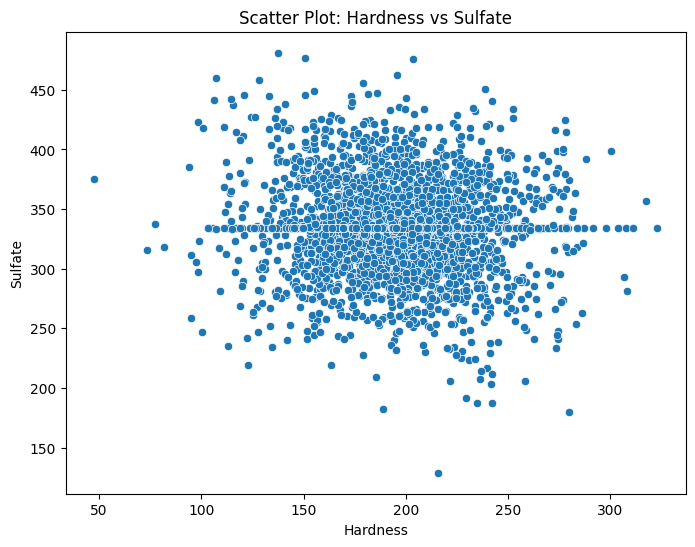

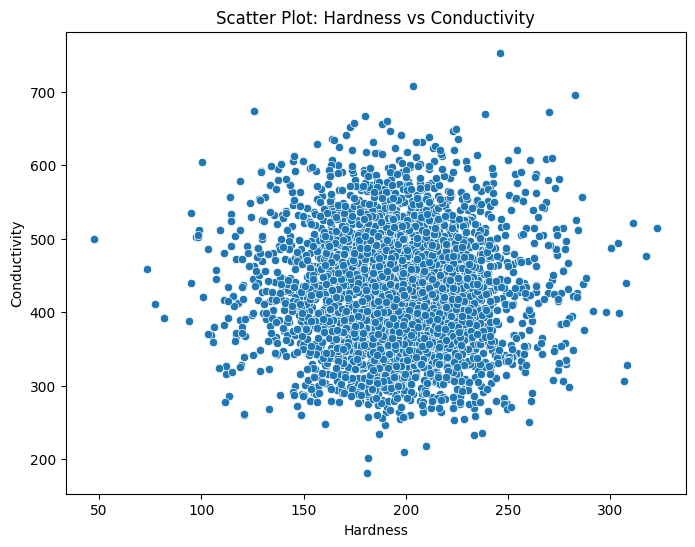

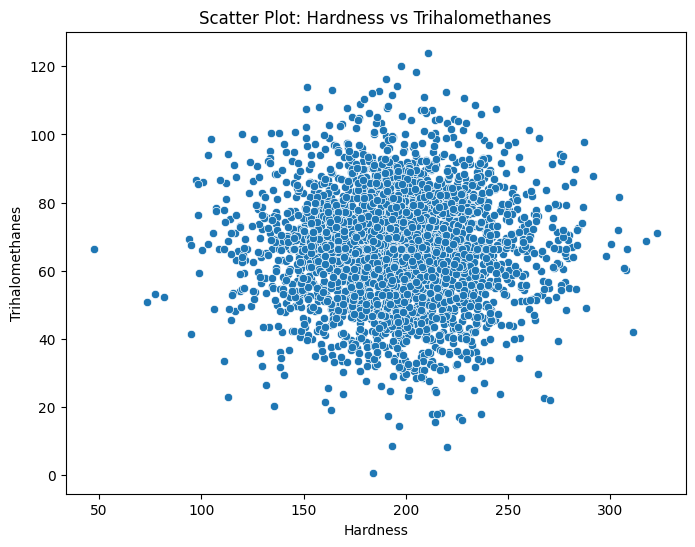

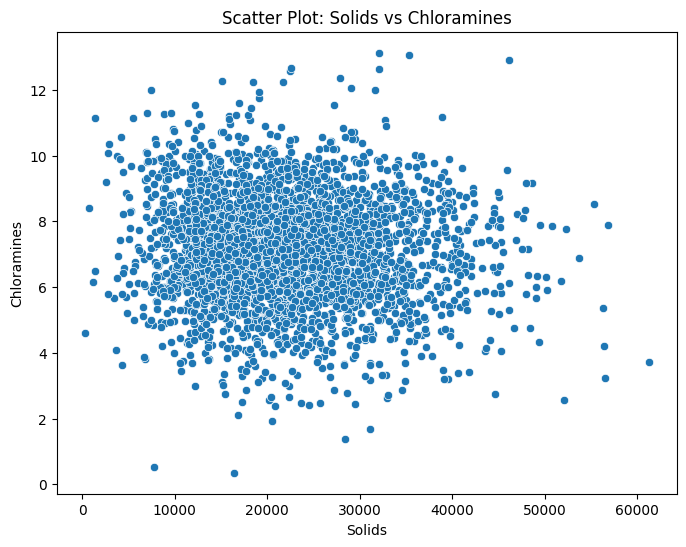

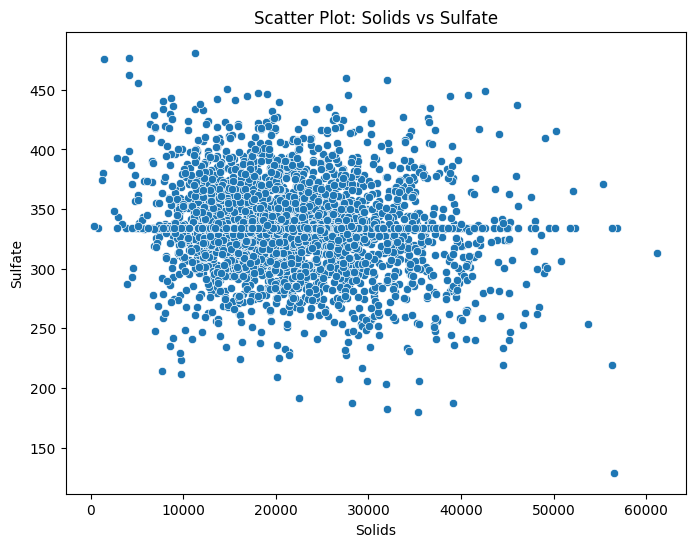

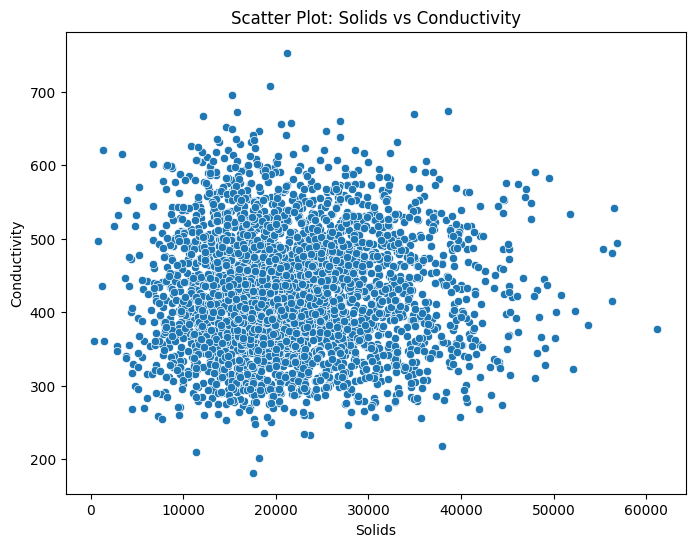

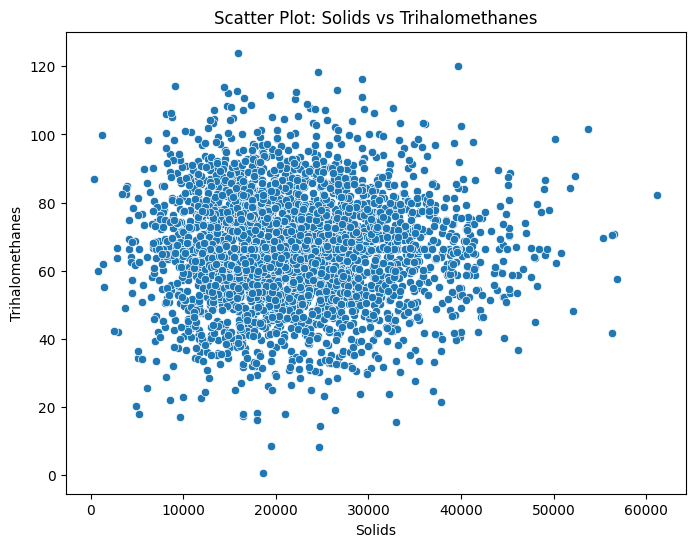

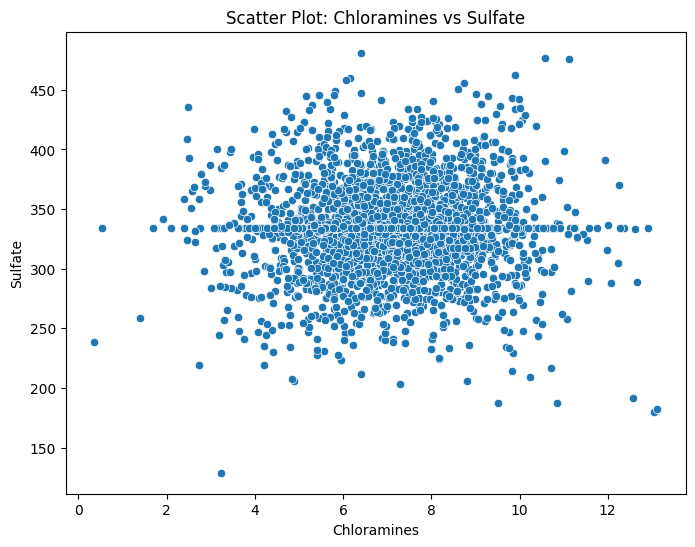

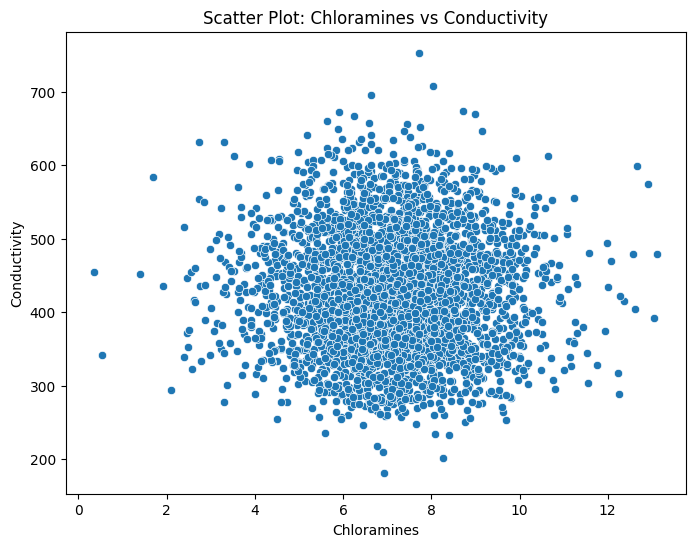

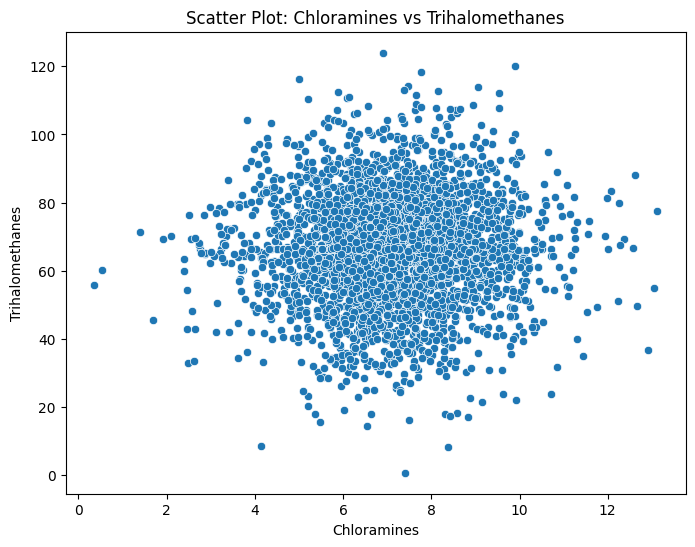

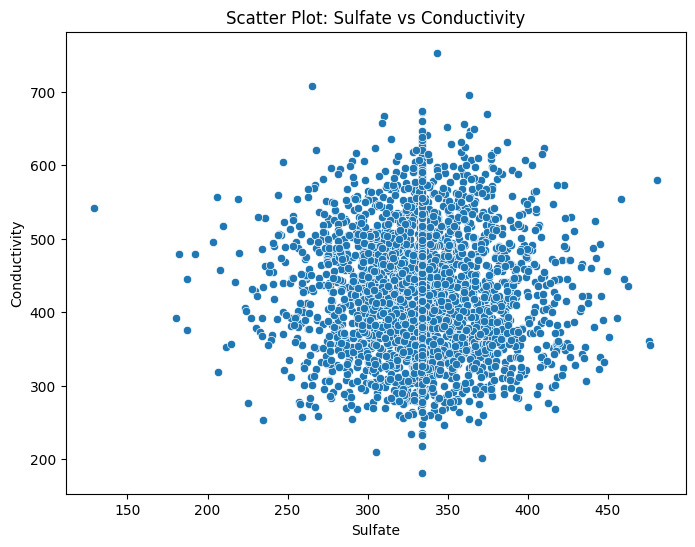

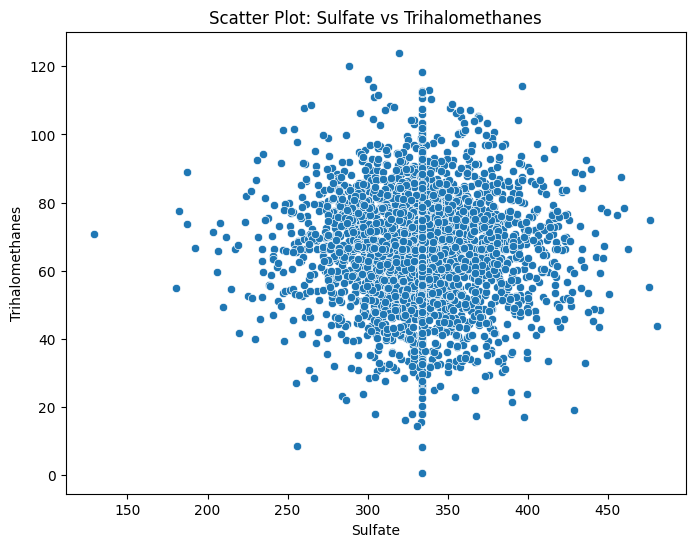

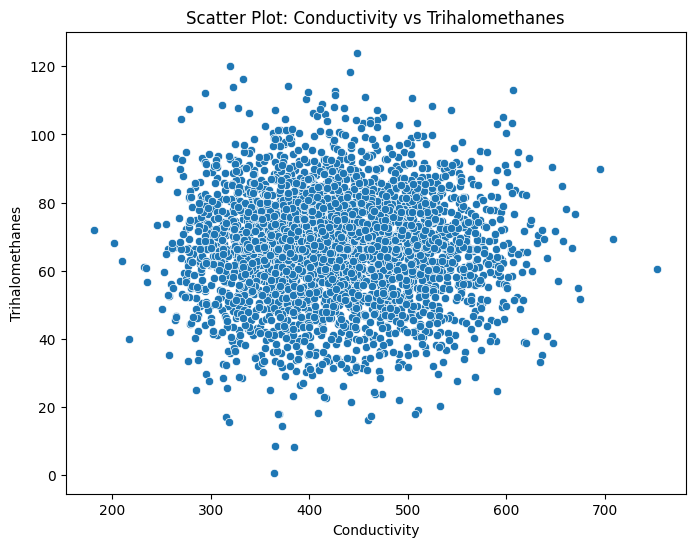

In [17]:
numerical_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Trihalomethanes']
for i in range(len(numerical_columns)):
    for j in range(i+1, len(numerical_columns)):
        x = numerical_columns[i]
        y = numerical_columns[j]        
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=x, y=y, data=water_data)       
        plt.title(f"Scatter Plot: {x} vs {y}")
        plt.xlabel(x)
        plt.ylabel(y)       
        plt.show()


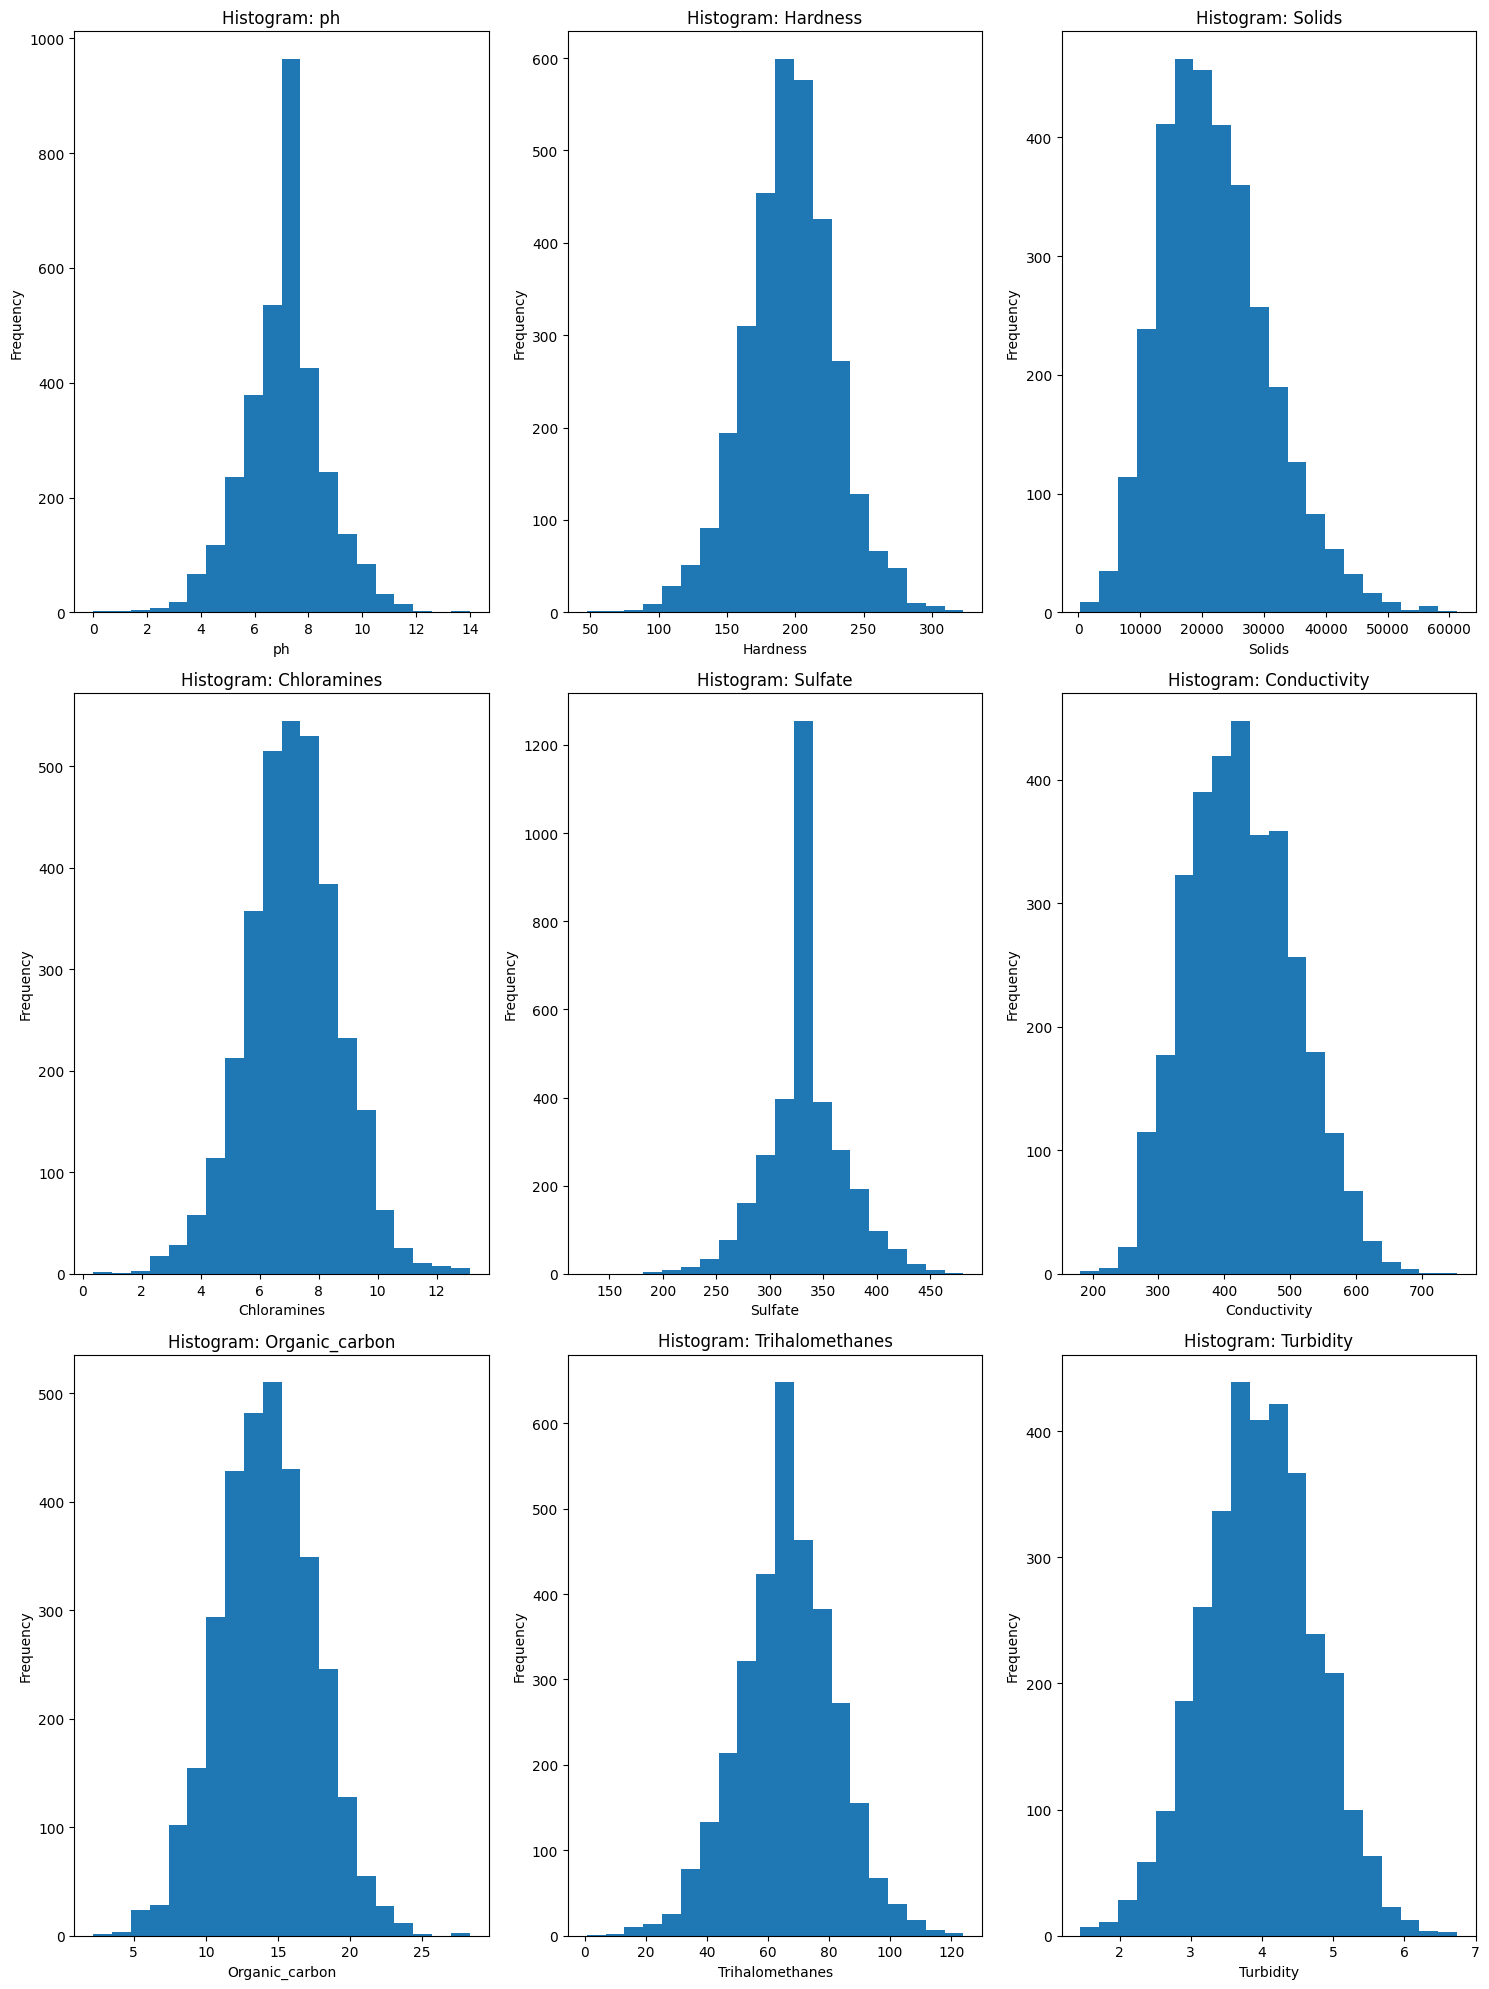

In [18]:
column_names = water_data.columns
num_rows = (len(column_names) - 1) // 3  
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axes = axes.flatten()
for i, column in enumerate(column_names):
    if column == 'Potability':
        continue
    ax = axes[i]
    ax.hist(water_data[column], bins=20)
    ax.set_title(f'Histogram: {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()


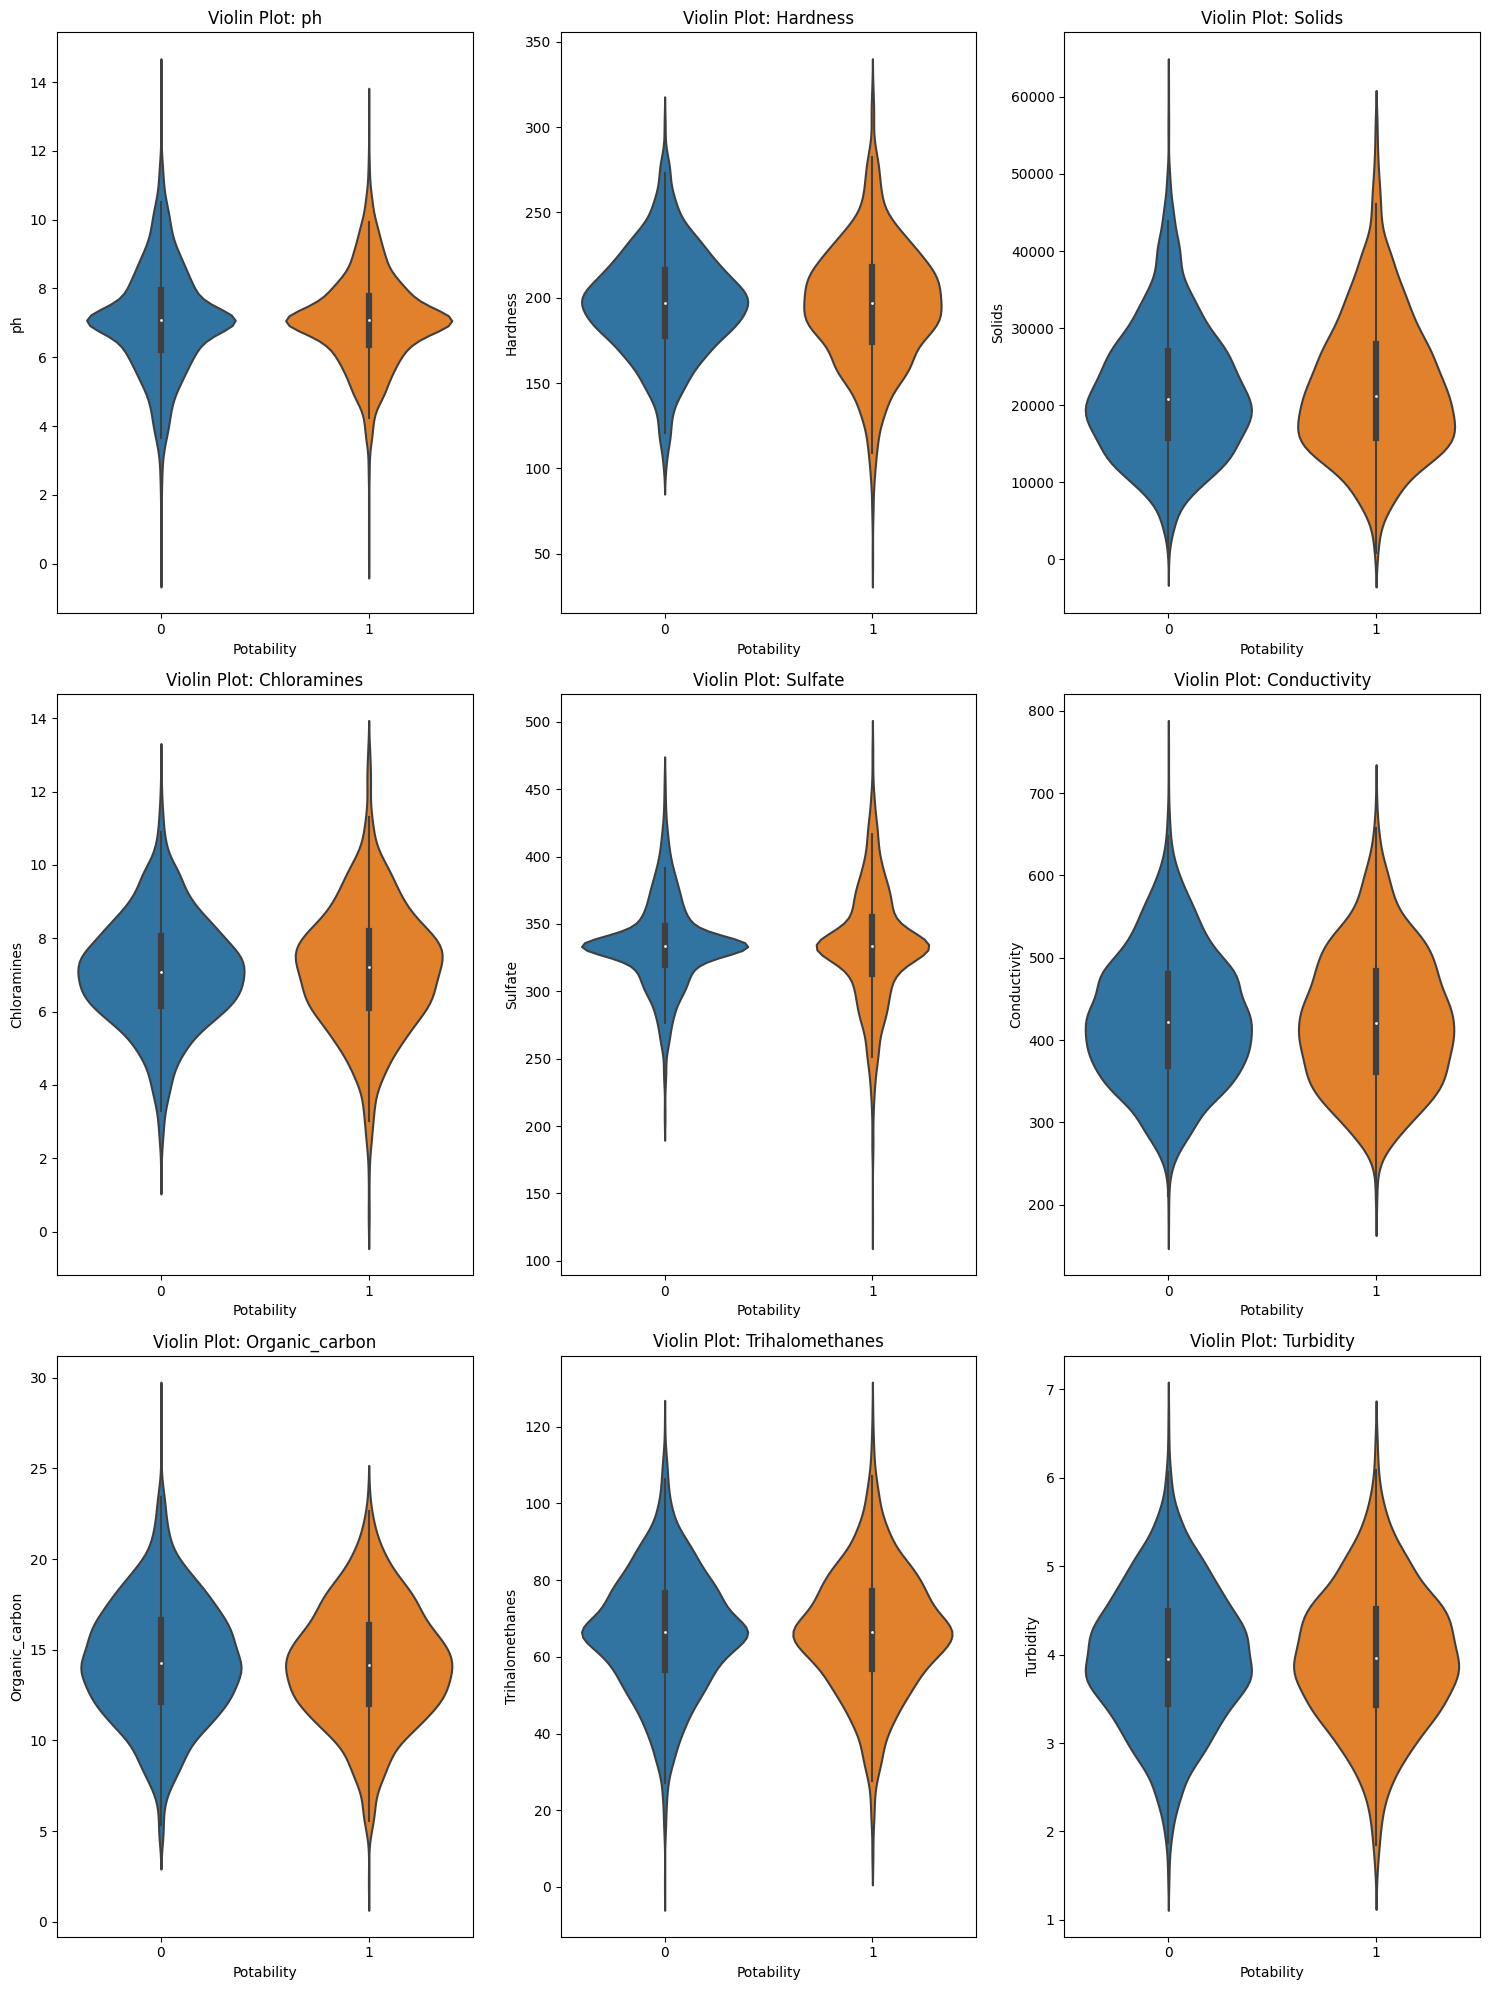

In [19]:
column_names = water_data.columns.drop('Potability')
num_rows = (len(column_names) - 1) // 3 + 1  
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axes = axes.flatten()
for i, column in enumerate(column_names):
    ax = axes[i] 
    sns.violinplot(data=water_data, x='Potability', y=column, ax=ax)
    ax.set_title(f'Violin Plot: {column}')
    ax.set_xlabel('Potability')
    ax.set_ylabel(column)
plt.tight_layout()
plt.show()


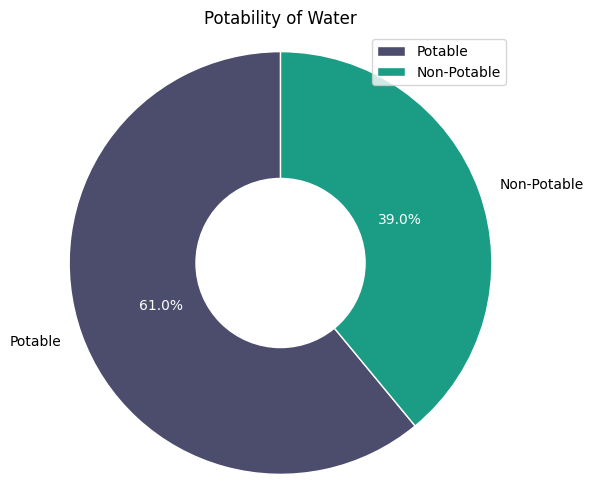

In [20]:
potable_count = water_data['Potability'].value_counts()
labels = ['Potable', 'Non-Potable']
sizes = potable_count.values

colors = ['#4C4C6D', '#1B9C85']


fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'white'})

for autotext in autotexts:
    autotext.set_color('white')


center_circle = plt.Circle((0, 0), 0.4, color='white')
ax.add_artist(center_circle)
ax.axis('equal')
ax.set_title('Potability of Water')
ax.legend(wedges, labels, loc='upper right')
plt.show()


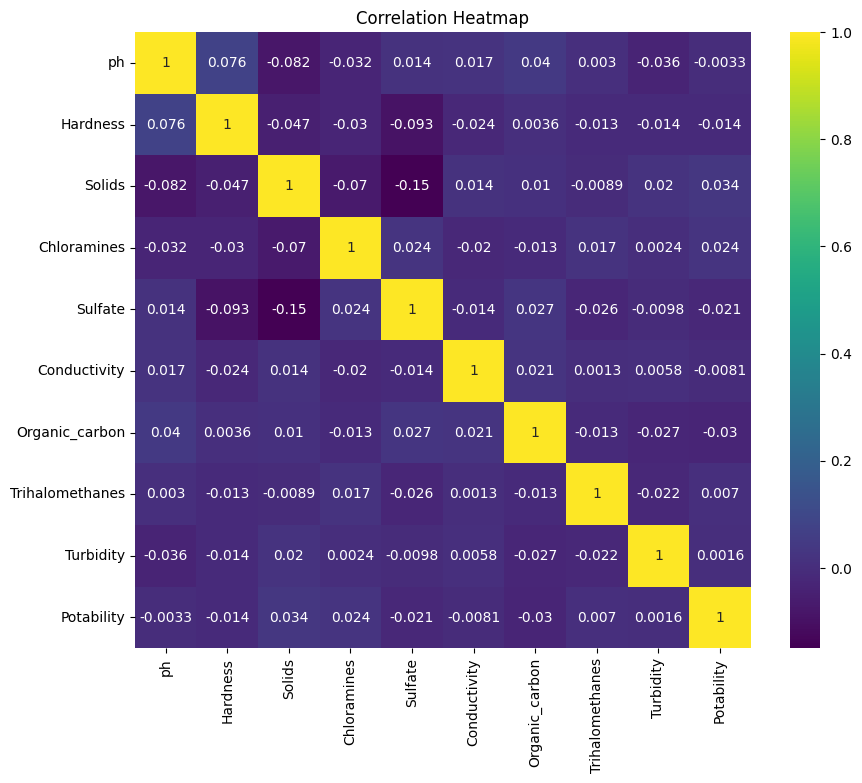

In [21]:
corr_matrix = water_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True)
plt.title('Correlation Heatmap')
plt.show()

## Train Test Split

In [22]:
x=water_data_new.drop('Potability',axis=1)
y=water_data_new['Potability']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

In [24]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(2666, 9) (2132, 9) (534, 9)
(2666,) (2132,) (534,)


## Model Building

In [25]:
model_lg=LogisticRegression()
model_lg.fit(x_train,y_train)

LogisticRegression()

In [26]:
#Training Data
X_train_prediction_lg=model_lg.predict(x_train)
Training_data_accuracy=accuracy_score(X_train_prediction_lg,y_train)
print('Training_data_accuracy:',Training_data_accuracy)

Training_data_accuracy: 0.6322701688555347


In [27]:
#Testing Data
X_test_prediction_lg=model_lg.predict(x_test)
Testing_data_accuracy=accuracy_score(X_test_prediction_lg,y_test)
print('Testing_data_accuracy:',Testing_data_accuracy)

Testing_data_accuracy: 0.6048689138576779


In [28]:
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
#Training Data
X_train_prediction_dt=model_dt.predict(x_train)
Training_data_accuracy=accuracy_score(X_train_prediction_dt,y_train)
print('Training_data_accuracy:',Training_data_accuracy)

Training_data_accuracy: 1.0


In [30]:
#Testing Data
X_test_prediction_dt=model_dt.predict(x_test)
Testing_data_accuracy=accuracy_score(X_test_prediction_dt,y_test)
print('Testing_data_accuracy:',Testing_data_accuracy)

Testing_data_accuracy: 0.5655430711610487


In [31]:
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
#Training Data
X_train_prediction_rf=model_rf.predict(x_train)
Training_data_accuracy=accuracy_score(X_train_prediction_rf,y_train)
print('Training_data_accuracy:',Training_data_accuracy)

Training_data_accuracy: 1.0


In [33]:
#Testing Data
X_test_prediction_rf=model_rf.predict(x_test)
Testing_data_accuracy=accuracy_score(X_test_prediction_rf,y_test)
print('Testing_data_accuracy:',Testing_data_accuracy)

Testing_data_accuracy: 0.6385767790262172


### Deploying model

In [35]:
import pickle
with open("model.pkl","wb")as files:
    pickle.dump(model_rf,files)